<a href="https://colab.research.google.com/github/IlyaZelinskiy/Wav2vec_CFT_SHIFT_LAB/blob/main/Multitask_lern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install jiwer
!pip install datasets
!pip install transformers
from datasets import load_dataset
import pandas as pd
from transformers import AutoConfig, Wav2Vec2Processor
import IPython.display as ipd
import numpy as np
import random
from scipy.io import wavfile
import scipy.signal as sps
from datasets import load_dataset, load_metric
slue = load_dataset("asapp/slue", "voxceleb")

In [ ]:
array = [
0.05325443786982249
,0.10579345088161209
,0.018461752821513168
,0.02244475138121547
,0.02907938257993385
,0.019636992221261883
,0.027192982456140352
,0.057776679231292094
,0.07423609730231324
,0.08568387440127727
,0.09328915740921198
,0.09985003749062735
,0.10508869928181204
,0.10847939365229749
,0.12081380729226197
,0.12836847446160785
,0.13892109767544586
,0.14030837004405286
,0.14326912612906736
,0.14085194016908736
,0.1424402896357938
,0.14316773562343732
,0.1443253881478242
,0.1497195141876804
,0.15671235857267188
,0.16119063109954457
,0.1643902175673487
,0.16993178717598909
,0.17800131204898317
,0.1849558976606585
,0.19255172413793104
,0.1938708260105448
,0.19594079878115137
,0.19505555555555557
,0.1985229759299781
,0.19871225577264653
,0.1969350794093062
,0.195406162464986
,0.18944413250982595
,0.1801295648684286
,0.1725796047616255
,0.16757826137553822
,0.1608112138383537
,0.1583992331655883
,0.15322676845997854
,0.08978594535067795
,0.15142289051820554
,0.15367216604576903
,0.1518996264185522
,0.24342105263157895
,0.09588485708493817
,0.39820627802690584
,0.23232184539338185
,0.10801393728222997
,0.5423306772908366
,0.5242581252943948
,0.18411552346570398
,0.13465730201017195
,0.1192804946599213
,0.312683284457478
,0.10320641282565131
,0.09555273189326556
,0.08244815376833586
,0.02060935100189306
,0.2025862068965517
,0.02851851851851852
,0.03240391861341371
,0.027890238416554206
,0.12676698586411309
,0.10044490075290896
,0.14232081911262798
,0.13444757685595382
,0.13592429874957757
,0.08280144304148744
,0.08720810084728249
,0.15715673181983733
,0.16337167505391806
,0.17065127782357792
,0.16966207177339615
,0.17198663286471538
,0.17104144225863144
,0.16793589452148217
,0.16677002875345323
,0.1691818903891978
,0.17220459731730395
,0.1722429438289818
,0.1747031607112994
,0.176033934252386
,0.1723335917598848
,0.16838223151868772
,0.1642275528169014
,0.16264259607930004
,0.16015236833388538
,0.1602246816083644
,0.15735667890426433
,0.15687377003092493
,0.1503831961396537
,0.14948774551423558
,0.15
,0.1
,0.1
,0.15
,0.165
,0.1
,0.0014110176965136105
,0.002036083931904304
,0.002921020110099989
,0.0029783647091879742
,0.003683858004018754
,0.003341550260202684
,0.004022795843110962
,0.0038642009384487995
,0.0032527881040892194
,0.0060831917575491865
,0.008316232854519927
,0.008579030243796493
,0.014114627887082978
,0.019063939166755917
,0.023350751143043764
,0.031067961165048542
,0.037639053893509015
,0.05806309043699243
,0.06652691968225949
,0.06902209582148326
,0.07499726087432891
,0.08520402521287183
,0.08799154569219646
,0.09726597659765977
,0.10548116205174762
,0.11201118946325543
,0.06910668672801708
,0.06672877203878136
,0.12732756359821662
,0.12929697596278109
,0.1302292904132337
,0.1346898588775845
,0.13874722113247026
,0.27012846028586934
,0.2931611669057867
,0.4279123414071511
,0.24315377670779417
,0.17434825651743482
,0.15976145637162587
,0.15927910375060886
,0.14735264735264736
,0.16167664670658682
,0.15869140625
,0.2138728323699422
,0.11316512615538346
,0.0947508896797153
,0.28434504792332266
,0.10211351222987414
,0.09785147127510509
,0.10288367546432063
,0.10160941628633197
,0.09980852082336046
,0.11075794621026895
,0.10950268503385477
,0.02289917712575846
,0.04803580308304326
,0.05874650837988827
,0.061298160360985766
,0.0860203057012161
,0.071172878500737
,0.078023323239482
,0.08372700149179513
,0.09321981615152077
,0.09587161436582747
,0.10173274596182086
,0.10967379077615298
,0.10951270825041223
,0.12131926412905364
,0.12542023641687453
,0.1279095421952565
,0.13094126050881916
,0.1290771785121311
,0.12902697389974882
,0.12698924731182795
,0.12869912831047692
,0.12570407279029464
,0.1193683983617159
,0.11744984588763316
,0.1152945022612107
,0.11048791113047267
,0.10917652212001752
,0.10659650645546273
,0.10325586434801452
,0.09710576142818501
,0.09174212438323483
,0.08922925978414914
,0.0840358988305684
,0.08010350143140277
,0.07639547203479619
,0.07211700100862939
,0.06670043904086458
,0.06209813874788494
,0.06128957439406239
,0.05280416101311624
,0.03163903982392186
,0.06591236995975397
,0.04987280364432349
,0.02926232017141108
,0.0412796098467255
,0.03710063163058809
,0.03398998869691587
,0.012532529790439666
,0.01232352237377363
,0.0006411078343377356
,0.4279123414071511
,0.01232352237377363
,0.0006411078343377356
,0.12698924731182795
,0.12869912831047692
,0.12570407279029464
,0.1193683983617159
,0.1933884297520661
,0.15702479338842976
,0.0739051094890511
,0.04582651391162029
,0.07127659574468086
,0.5271129960617994
,0.04443815454288141
,0.3769664588898783
,0.4279123414071511
,0.13874722113247026
,0.27012846028586934
,0.2931611669057867
,0.4279123414071511
,0.04287962234461054
,0.04249189773136478
,0.04945054945054945
,0.14608695652173914
,0.1031138335885656
,0.1933884297520661
,0.15702479338842976
,0.06738627602158828
,0.058945764355475515
,0.05939660590823381
,0.05544267053701016
,0.0739051094890511
,0.04582651391162029
,0.07127659574468086
,0.5271129960617994
,0.04443815454288141
,0.3769664588898783
,0.039603960396039604
,0.039959016393442626
,0.031922525107604016
,0.017842981760507533
,0.017424564385890354
,0.01264718709114697
,0.015113350125944584
,0.005043530471329931
,0.0012479201331114808
,1.0
,0.13874722113247026
,0.27012846028586934
,0.2931611669057867
,0.4279123414071511
,0.00045495905368516835
,0.04582651391162029
,0.07127659574468086
,0.5271129960617994
,0.04443815454288141
,0.08780321147933037
,0.07780059320100388
,0.08566682486948268
,0.07234406152093421
,0.04040404040404041
,0.012623074981065387
,0.03910614525139665
,0.009084302325581396
,0.08780321147933037
,0.08780321147933037
,0.07619738751814223
,0.08780321147933037
,0.07780059320100388
,0.08566682486948268
,0.07234406152093421
,0.07658157602663707
,0.16363636363636364
,0.050385647216633134
,0.038872691933916424
,0.03540100250626566
,0.03177405119152692
,0.028173104850421144
,0.09944237918215613
,0.0351137487636004
,0.016563146997929608
,0.04040404040404041
,0.012623074981065387
,0.3910614525139665
,0.009084302325581396
,0.0051792828685258965
,0.004114661911946235
,0.002615025796876104
,0.0008056394763343404
,0.13574872705305943
,0.13574872705305943
,0.13574872705305943
,0.03333333333333333
,0.0012531328320802004
,0.0011904761904761906
,0.0004391743522178305
,0.13574872705305943
,0.07658157602663707
,0.16363636363636364
,0.050385647216633134
,0.38872691933916424
,0.03540100250626566
,0.13574872705305943
,0.14030837004405286
,0.13574872705305943
,0.14326912612906736
,0.14085194016908736
,0.1424402896357938
#,0.0
#,0.0
#,0.0
#,0.0
#,0.0
#,0.0
,0.00013909173099659226
,0.13574872705305943
#,0.0
#,0.0
#,0.0
,0.006944444444444444
,0.09510086455331412
,0.008588186007540846
,0.010113268608414239
,0.004317386231038506
,0.005651777575205105
,0.00655961000788587
,0.0072388460849310155
,0.020477815699658702
,0.008686370495785639
,0.014147018030513176
,0.310838445807771
,0.2914691943127962
,0.02354609929078014
,0.024547483263079595
,0.23062015503875968
,0.17962003454231434
,0.14332784184514002
,0.13153724247226625
,0.18075801749271136
,0.1880108991825613
,0.1773142112125163
,0.15867158671586715
,0.12171837708830549
,0.056090846524432206
,0.05255579553635709
,0.07292445774121167
,0.07765619484645252
,0.05501392757660167
,0.0539504548315121
,0.05429656045093754
,0.0536916647318319
,0.05287686996547756
,0.0324994802854965
,0.3212714436751816
,0.3154908394859174
,0.031866360237368364
,0.31899468342194294
,0.05480666903157148
,0.05397494438590329
,0.06322212125146047
,0.06393963463065926
,0.06263484798953907
,0.06148953087728598
,0.437190900098912
,0.4969173859432799
,0.3008241758241758
,0.55915863277826466
,0.050048278081750885
,0.3894034458719251
,0.32948929159802305
,0.022899353647276084
,0.017523809523809525
,0.012897678417884782
,0.009307385470808654
,0.004729148753224419
,0.0011064394777605664
,0.012897678417884782
,0.05397494438590329
,0.06322212125146047
,0.06393963463065926
,0.3
,0.1
,0.002880658436213992
,0.007679180887372013
,0.572289156626506
,0.418212478920742
,0.04081820694738782
,0.1318082788671024
,0.1838170624450308
,0.21015067406819984
,0.2453555413196669
,0.10449792293367713
,0.09856175972927242
,0.10059896542335965
,0.10229659237179053
,0.10112650524407614
,0.07571868583162218
,0.07037869617845409
,0.07089976240487586
,0.11778002498364167
,0.11869310989209718
,0.11858110132422554
,0.09856175972927242
,0.10059896542335965
,0.10229659237179053
,0.10112650524407614
,0.07571868583162218
,0.07037869617845409
,0.07089976240487586
,0.11778002498364167
,0.11869310989209718
,0.11858110132422554
,0.12493130610001832
,0.13433109346365302
,0.1356402218471184
,0.13744958113558797
,0.13072513072513073
,0.13402375875723424
,0.13348860014709488
,0.12315554136058768
,0.12448546837969315
,0.11708084303240013
,0.11298844925043008
,0.10985006869362643
,0.10635530594147206
,0.10349708085156573
,0.10145098501828477
,0.09730591988656505
,0.09183734400191079
,0.08458926550306785
,0.8376743907550446
,0.07930807445980727
,0.07637915269734837
,0.07282360914299797
,0.07282842331521051
,0.03813256091327313
,0.03620097784250494
,0.6943936846721731
,0.06824463184749487
,0.6961801878133164
,0.07111665626949469
,0.10589080459770114
,0.10668600817618357
,0.10798174329288657
,0.1613865076407007
,0.05666400638467677
,0.09042553191489362
,0.049840691852526174
,0.040128177117471416
,0.03997108782074449
,0.04083931840585833
,0.039365411436541146
,0.03800483379452871
,0.03554206108233613
,0.05521616541353384
,0.10925230454079891
,0.09000390472471691
,0.0789355992844365
,0.5982596084118927
,0.4730831973898858
,0.06653225806451613
,0.042352941176470586
,0.059496567505720827
,0.07708933717579251
,0.08376156217882837
,0.08184251303000423
,0.09286813750641354
,0.08463041574017924
,0.08246081407595564
,0.08346111719605695
,0.19331742243436753
,0.060841423948220064
,0.06500433362224148
,0.60929478519319104
,0.07011070110701106
,0.07658227848101266
,0.08189081225033289
,0.07389659520807061
,0.08407382091592618
,0.07894736842105263
,0.7263922518159806
,0.07542147293700088
,0.052307692307692305
,0.05487977369165488
,0.053904428904428904
,0.04950495049504951
,0.0466710182767624
,0.044398196323274366
,0.03333333333333333
,0.018589636555908055
,0.011616919570896559
,0.06133600981376157
,0.014814814814814815
,0.01
,0.002949208083014746
,0.0018117931261666849
,0.0006061273969583425
,0.12493130610001832
,0.13433109346365302
,0.12493130610001832
,0.13433109346365302
,0.08407382091592618
,0.7894736842105263
,0.08407382091592618
,0.07894736842105263
,0.07037869617845409
,0.07089976240487586
,0.11778002498364167
,0.11869310989209718
,0.11858110132422554
,0.13433109346365302
,0.5487977369165488
]
len(array)

511

In [ ]:
array_1 = []
array_2 = []
array_3 = []
array_4 = []
array_5 = []
for i in array:
    if i>0.5:
        array_1.append(i)
    elif i<0.05:
        array_2.append(i)
    elif i >0.05 and i <= 0.15:
        array_3.append(i)
    elif i >0.15 and i < 0.5:
        array_4.append(i)
    else:
        array_5.append(i)

In [ ]:
array_5

[0.15, 0.15]

In [ ]:
len(array_1)+len(array_2)+len(array_3)+len(array_4) 

511

In [ ]:
y = [len(array_1), len(array_2), len(array_3), len(array_4)]
x = [0,1,2,3]

(array([268., 188.,  17.,  13.,   9.,   9.,   3.,   2.,   1.,   1.]),
 array([1.39091731e-04, 1.00125183e-01, 2.00111273e-01, 3.00097364e-01,
        4.00083455e-01, 5.00069546e-01, 6.00055637e-01, 7.00041728e-01,
        8.00027818e-01, 9.00013909e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

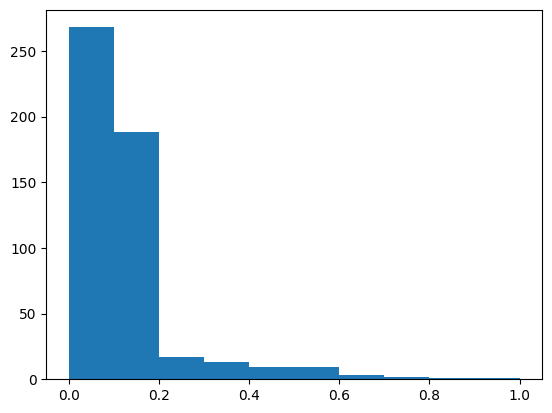

In [ ]:
plt.hist(array, 
         histtype ='bar')

In [ ]:
#for i in array:
#    if i == 0:
#        i = 1

from statistics import mean
mean(array)

0.12327363648164535

In [ ]:
array = [0.1518996264185522
,0.24342105263157895
,0.09588485708493817
,0.39820627802690584
,0.23232184539338185
,0.10801393728222997
,0.5423306772908366
,0.5242581252943948
,0.18411552346570398
,0.13465730201017195
,0.1192804946599213
,0.312683284457478
,0.10320641282565131
,0.09555273189326556
,0.08244815376833586
,0.02060935100189306
,0.2025862068965517
,0.02851851851851852
,0.03240391861341371
,0.027890238416554206
,0.12676698586411309
,0.10044490075290896
,0.14232081911262798
,0.13444757685595382
,0.13592429874957757
,0.08280144304148744
,0.08720810084728249
,0.15715673181983733
,0.16337167505391806
,0.17065127782357792
,0.16966207177339615
,0.17198663286471538
,0.17104144225863144
,0.16793589452148217
,0.16677002875345323
,0.1691818903891978
,0.17220459731730395
,0.1722429438289818
,0.1747031607112994
,0.176033934252386
,0.1723335917598848
,0.16838223151868772
,0.1642275528169014
,0.16264259607930004
,0.16015236833388538
,0.1602246816083644
,0.15735667890426433
,0.15687377003092493
,0.1503831961396537
,0.14948774551423558]

In [ ]:
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0014110176965136105
,0.002036083931904304
,0.002921020110099989
,0.0029783647091879742
,0.003683858004018754
,0.003341550260202684
,0.004022795843110962
,0.0038642009384487995
,0.0032527881040892194
,0.0060831917575491865
,0.008316232854519927
,0.008579030243796493
,0.014114627887082978
,0.019063939166755917
,0.023350751143043764
,0.031067961165048542
,0.037639053893509015
,0.05806309043699243
,0.06652691968225949
,0.06902209582148326
,0.07499726087432891
,0.08520402521287183
,0.08799154569219646
,0.09726597659765977
,0.10548116205174762
,0.11201118946325543
,0.06910668672801708
,0.06672877203878136
,0.12732756359821662
,0.12929697596278109
,0.1302292904132337
,0.1346898588775845
,0.13874722113247026
,0.27012846028586934
,0.2931611669057867
,0.4279123414071511
,0.24315377670779417
,0.17434825651743482
,0.15976145637162587
,0.15927910375060886
,0.14735264735264736
,0.16167664670658682
,0.15869140625
,0.2138728323699422
,0.11316512615538346
,0.0947508896797153
,0.28434504792332266
,0.10211351222987414
,0.09785147127510509
,0.10288367546432063
,0.10160941628633197
,0.09980852082336046
,0.11075794621026895
,0.10950268503385477
,0.02289917712575846
,0.04803580308304326
,0.05874650837988827
,0.061298160360985766
,0.0860203057012161
,0.071172878500737
,0.078023323239482
,0.08372700149179513
,0.09321981615152077
,0.09587161436582747
,0.10173274596182086
,0.10967379077615298
,0.10951270825041223
,0.12131926412905364
,0.12542023641687453
,0.1279095421952565
,0.13094126050881916
,0.1290771785121311
,0.12902697389974882
,0.12698924731182795
,0.12869912831047692
,0.12570407279029464
,0.1193683983617159
,0.11744984588763316
,0.1152945022612107
,0.11048791113047267
,0.10917652212001752
,0.10659650645546273
,0.10325586434801452
,0.09710576142818501
,0.09174212438323483
,0.08922925978414914
,0.0840358988305684
,0.08010350143140277
,0.07639547203479619
,0.07211700100862939
,0.06670043904086458
,0.06209813874788494
,0.06128957439406239
,0.05280416101311624
,0.03163903982392186
,0.06591236995975397
,0.04987280364432349
,0.02926232017141108
,0.0412796098467255
,0.03710063163058809
,0.03398998869691587
,0.012532529790439666
,0.01232352237377363
,0.0006411078343377356
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.04287962234461054
,0.04249189773136478
,0.04945054945054945
,0.14608695652173914
,0.1031138335885656
,0.1933884297520661
,0.15702479338842976
,0.06738627602158828
,0.058945764355475515
,0.05939660590823381
,0.05544267053701016
,0.0739051094890511
,0.04582651391162029
,0.07127659574468086
,0.5271129960617994
,0.04443815454288141
,0.3769664588898783
,0.039603960396039604
,0.039959016393442626
,0.031922525107604016
,0.017842981760507533
,0.017424564385890354
,0.01264718709114697
,0.015113350125944584
,0.005043530471329931
,0.0012479201331114808
,0.0
,0.0
,0.0
,0.0
,0.0

In [ ]:
,0.00045495905368516835
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.07619738751814223
,0.08780321147933037
,0.07780059320100388
,0.08566682486948268
,0.07234406152093421
,0.07658157602663707
,0.16363636363636364
,0.050385647216633134
,0.038872691933916424
,0.03540100250626566
,0.03177405119152692
,0.028173104850421144
,0.09944237918215613
,0.0351137487636004
,0.016563146997929608
,0.04040404040404041
,0.012623074981065387
,0.03910614525139665
,0.009084302325581396
,0.0051792828685258965
,0.004114661911946235
,0.002615025796876104
,0.0008056394763343404
,0.0
,0.0
,0.0
,0.03333333333333333
,0.0012531328320802004
,0.0011904761904761906
,0.0004391743522178305
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.00013909173099659226
,0.0
,0.0
,0.0
,0.0
,0.0
,0.006944444444444444
,0.09510086455331412
,0.008588186007540846
,0.010113268608414239
,0.004317386231038506
,0.005651777575205105
,0.00655961000788587
,0.0072388460849310155
,0.020477815699658702
,0.008686370495785639
,0.014147018030513176
,0.310838445807771
,0.2914691943127962
,0.02354609929078014
,0.024547483263079595
,0.23062015503875968
,0.17962003454231434
,0.14332784184514002
,0.13153724247226625
,0.18075801749271136
,0.1880108991825613
,0.1773142112125163
,0.15867158671586715
,0.12171837708830549
,0.056090846524432206
,0.05255579553635709
,0.07292445774121167
,0.07765619484645252
,0.05501392757660167
,0.0539504548315121
,0.05429656045093754
,0.0536916647318319
,0.05287686996547756
,0.0324994802854965
,0.03212714436751816
,0.03154908394859174
,0.031866360237368364
,0.031899468342194294
,0.05480666903157148
,0.05397494438590329
,0.06322212125146047
,0.06393963463065926
,0.06263484798953907
,0.06148953087728598
,0.437190900098912
,0.4969173859432799
,0.3008241758241758
,0.55915863277826466
,0.050048278081750885
,0.03894034458719251
,0.032948929159802305
,0.022899353647276084
,0.017523809523809525
,0.012897678417884782
,0.009307385470808654
,0.004729148753224419
,0.0011064394777605664
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.002880658436213992
,0.007679180887372013
,0.0572289156626506
,0.0418212478920742
,0.04081820694738782
,0.1318082788671024
,0.1838170624450308
,0.21015067406819984
,0.2453555413196669
,0.10449792293367713
,0.09856175972927242
,0.10059896542335965
,0.10229659237179053
,0.10112650524407614
,0.07571868583162218
,0.07037869617845409
,0.07089976240487586
,0.11778002498364167
,0.11869310989209718
,0.11858110132422554

In [ ]:
,0.09856175972927242
,0.10059896542335965
,0.10229659237179053
,0.10112650524407614
,0.07571868583162218
,0.07037869617845409
,0.07089976240487586
,0.11778002498364167
,0.11869310989209718
,0.11858110132422554
,0.12493130610001832
,0.13433109346365302
,0.1356402218471184
,0.13744958113558797
,0.13072513072513073
,0.13402375875723424
,0.13348860014709488
,0.12315554136058768
,0.12448546837969315
,0.11708084303240013
,0.11298844925043008
,0.10985006869362643
,0.10635530594147206
,0.10349708085156573
,0.10145098501828477
,0.09730591988656505
,0.09183734400191079
,0.08458926550306785
,0.08376743907550446
,0.07930807445980727
,0.07637915269734837
,0.07282360914299797
,0.07282842331521051
,0.03813256091327313
,0.03620097784250494
,0.06943936846721731
,0.06824463184749487
,0.06961801878133164
,0.07111665626949469
,0.10589080459770114
,0.10668600817618357
,0.10798174329288657
,0.1613865076407007
,0.05666400638467677
,0.09042553191489362
,0.049840691852526174
,0.040128177117471416
,0.03997108782074449
,0.04083931840585833
,0.039365411436541146
,0.03800483379452871
,0.03554206108233613
,0.05521616541353384
,0.10925230454079891
0.09000390472471691
,0.0789355992844365
,0.5982596084118927
,0.4730831973898858
,0.06653225806451613
,0.042352941176470586
,0.059496567505720827
,0.07708933717579251
,0.08376156217882837
,0.08184251303000423
,0.09286813750641354
,0.08463041574017924
,0.08246081407595564
,0.08346111719605695
,0.19331742243436753
,0.060841423948220064
,0.06500433362224148
,0.060929478519319104
,0.07011070110701106
,0.07658227848101266
,0.08189081225033289
,0.07389659520807061
,0.08407382091592618
,0.07894736842105263
,0.07263922518159806
,0.07542147293700088
,0.052307692307692305
,0.05487977369165488
,0.053904428904428904
,0.04950495049504951
,0.0466710182767624
,0.044398196323274366
,0.03333333333333333
,0.018589636555908055
,0.011616919570896559
,0.006133600981376157
,0.014814814814814815
,0.01
,0.002949208083014746
,0.0018117931261666849
,0.0006061273969583425
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0
,0.0

In [ ]:
slue = slue.remove_columns(['id','speaker_id','start_second','end_second'])


In [ ]:
slue

DatasetDict({
    train: Dataset({
        features: ['audio', 'normalized_text', 'sentiment'],
        num_rows: 5777
    })
    validation: Dataset({
        features: ['audio', 'normalized_text', 'sentiment'],
        num_rows: 1454
    })
    test: Dataset({
        features: ['audio', 'normalized_text', 'sentiment'],
        num_rows: 3553
    })
})

In [ ]:
from transformers import AutoProcessor, AutoModelForCTC

processor = AutoProcessor.from_pretrained("facebook/wav2vec2-large-960h-lv60-self", attention_mask = True)

In [ ]:
import re
chars_to_ignore_regex = '[\,\?\.\!\-\;\:\"]'

def remove_special_characters(batch):
    batch["normalized_text"] = re.sub(chars_to_ignore_regex, '', batch["normalized_text"]).upper()
    return batch

slue = slue.map(remove_special_characters)

Map:   0%|          | 0/5777 [00:00<?, ? examples/s]

Map:   0%|          | 0/1454 [00:00<?, ? examples/s]

Map:   0%|          | 0/3553 [00:00<?, ? examples/s]

In [ ]:
slue

DatasetDict({
    train: Dataset({
        features: ['audio', 'normalized_text', 'sentiment'],
        num_rows: 5777
    })
    validation: Dataset({
        features: ['audio', 'normalized_text', 'sentiment'],
        num_rows: 1454
    })
    test: Dataset({
        features: ['audio', 'normalized_text', 'sentiment'],
        num_rows: 3553
    })
})

In [ ]:
def prepare_dataset(batch):
    audio = batch["audio"]

    batch["input_values"] = processor(audio["array"], sampling_rate=audio["sampling_rate"]).input_values[0]
    #batch["input_length"] = len(batch["input_values"])
    
    with processor.as_target_processor():
        batch["labels_text"] = processor(batch["normalized_text"]).input_ids
        batch['sentimen'] = batch['sentiment']

    return batch

In [ ]:
dataset = slue.map(prepare_dataset, remove_columns=slue.column_names["train"],
                               num_proc=4)

Map (num_proc=4):   0%|          | 0/5777 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call

Map (num_proc=4):   0%|          | 0/1454 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call

Map (num_proc=4):   0%|          | 0/3553 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_values', 'labels_text', 'sentimen'],
        num_rows: 5777
    })
    validation: Dataset({
        features: ['input_values', 'labels_text', 'sentimen'],
        num_rows: 1454
    })
    test: Dataset({
        features: ['input_values', 'labels_text', 'sentimen'],
        num_rows: 3553
    })
})

In [ ]:
dataset['train']['input_values'][0]

# Новый раздел

In [ ]:
%%capture
dataset = load_dataset("common_voice", "ru")

In [ ]:
dataset['train']['aud']

DatasetDict({
    train: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 15481
    })
    test: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 8007
    })
    validation: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 7963
    })
    other: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 10247
    })
    validated: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 74256
    })
    invalidated: Dataset({
        featu

In [ ]:
dataset['train'] = dataset['train'].remove_columns(['client_id','path','up_votes','down_votes','gender','accent','locale','segment'])


In [ ]:
dataset['train']["audio"][0]['path']

In [ ]:
dataset['train'][0]

{'client_id': '299f0dd85f2861f679e92991dc15e9adbdcc7cb8ce7e6df075f462a56ec7664f2f5e37671d88006d525e3c5454dd5e1258bf38e85df96b1356861fadbf259999',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/707cd877a91cbe3455d83b9f62c3656e094f633f257743683372c05f4620af3b/cv-corpus-6.1-2020-12-11/ru/clips/common_voice_ru_18849051.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/707cd877a91cbe3455d83b9f62c3656e094f633f257743683372c05f4620af3b/cv-corpus-6.1-2020-12-11/ru/clips/common_voice_ru_18849051.mp3',
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 48000},
 'sentence': 'В особенности, я повторяю, мы отводим высочайший приоритет ядерному разоружению.',
 'up_votes': 2,
 'down_votes': 0,
 'age': 'twenties',
 'gender': 'male',
 'accent': '',
 'locale': 'ru',
 'segment': "''"}

# Новый раздел

In [ ]:
DF = pd.DataFrame(dataset['train']['sentimen'], columns=['sentimen'])
DF['sentimen'].unique()

array(['Neutral', 'Positive', '<mixed>', 'Negative'], dtype=object)

In [ ]:
label_list = ['Neutral', 'Positive', '<mixed>', 'Negative']
num_labels =len(label_list)

In [ ]:
model_name_or_path =  "facebook/wav2vec2-large-960h-lv60-self"
pooling_mode = "mean"

In [ ]:
config_1 = AutoConfig.from_pretrained(
    model_name_or_path,
    num_labels=num_labels,
    label2id={label: i for i, label in enumerate(label_list)},
    id2label={i: label for i, label in enumerate(label_list)},
    finetuning_task="wav2vec2_clf",
)
setattr(config_1, 'pooling_mode', pooling_mode)

In [ ]:
config_2 = AutoConfig.from_pretrained(
    model_name_or_path
)

In [ ]:
config_2

In [ ]:
config_1

In [ ]:
#processor = Wav2Vec2Processor.from_pretrained(model_name_or_path,)
target_sampling_rate = processor.feature_extractor.sampling_rate
print(f"The target sampling rate: {target_sampling_rate}")

The target sampling rate: 16000


In [ ]:
def label_to_id(label, label_list):

    if len(label_list) > 0:
        return label_list.index(label) if label in label_list else -1

    return label
    
def preprocess_function(examples):
    speech_list = [examples for examples in examples['input_values']]
    target_list = [label_to_id(label, label_list) for label in examples['sentimen']]
    

    result = processor(speech_list, sampling_rate=target_sampling_rate)
    result["labels_sentiment"] = list(target_list)
    result['text'] = examples['labels_text']

    return result

In [ ]:
train_dataset = dataset['train'].map(
    preprocess_function,
    batch_size=100,
    batched=True,
    num_proc=4
)
test_dataset = dataset['validation'].map(
    preprocess_function,
    batch_size=100,
    batched=True,
    num_proc=4
)

Map (num_proc=4):   0%|          | 0/5777 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/feature_extraction_utils.py:165: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.10/dist-packages/transformers/feature_extraction_utils.py:165: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.10/dist-packages/transformers/feature_extraction_utils.py:165: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

Map (num_proc=4):   0%|          | 0/1454 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/feature_extraction_utils.py:165: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.10/dist-packages/transformers/feature_extraction_utils.py:165: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.10/dist-packages/transformers/feature_extraction_utils.py:165: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

In [ ]:
test_dataset = test_dataset.remove_columns(['sentimen','text'])
train_dataset = train_dataset.remove_columns(['sentimen','text'])

In [ ]:
train_dataset

Dataset({
    features: ['input_values', 'labels_text', 'attention_mask', 'labels_sentiment'],
    num_rows: 5777
})

In [ ]:
len(processor.tokenizer)

32

# Data_collator 1

In [ ]:
import torch
from dataclasses import dataclass, field
from typing import Any, Dict, List, Optional, Union

@dataclass
class DataCollatorCTCWithPadding:
    """
    Data collator that will dynamically pad the inputs received.
    -Сопоставитель данных, который будет динамически дополнять полученные входные данные.
    Args:
        processor (:class:`~transformers.Wav2Vec2Processor`)
            The processor used for proccessing the data.
            -Процессор, используемый для обработки данных.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.tokenization_utils_base.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            -
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided). - Дополнение к самой длинной последовательности в пакете (или без заполнения, если только одна
              последовательность, если она указана).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided. - Дополнить до максимальной длины, указанной аргументом :obj:`max_length`, или до
              максимальная приемлемая длина входных данных для модели, если этот аргумент не указан.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
    """

    processor: Wav2Vec2Processor
    padding: Union[bool, str] = True

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lenghts and need
        # different padding methods
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [{"input_ids": feature["labels_text"]} for feature in features]
        label_features_ = [{"input_ids": feature["labels_sentiment"]} for feature in features]

        batch = self.processor.pad(
            input_features,
            padding=self.padding,
            return_tensors="pt",
        )
        with self.processor.as_target_processor():
            labels_batch = self.processor.pad(
                label_features,
                padding=self.padding,
                return_tensors="pt",
            )
            labels_sent_batch = self.processor.pad(
                label_features_,
                padding=self.padding,
                return_tensors="pt",
            )

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        batch["labels_text"] = labels
        batch["labels_sentiment"] = labels_sent_batch['input_ids']

        return batch

In [ ]:
train_dataset

Dataset({
    features: ['input_values', 'labels_text', 'attention_mask', 'labels_sentiment'],
    num_rows: 5777
})

In [ ]:
data_collator = DataCollatorCTCWithPadding(processor=processor, padding=True)

In [ ]:
from torch.utils.data import DataLoader

train_DataLoader = DataLoader(train_dataset, shuffle = True, batch_size = 6, collate_fn= data_collator)
test_DataLoader = DataLoader(test_dataset, shuffle = True, batch_size = 6, collate_fn= data_collator)

# Model with class classification and translate

In [ ]:
is_regression = False
is_CTC = True

In [ ]:
import torch
import torch.nn as nn
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss, MSELoss

from transformers.models.wav2vec2.modeling_wav2vec2 import (
    Wav2Vec2PreTrainedModel,
    Wav2Vec2Model
)

In [ ]:
class Wav2Vec2ClassificationHead(nn.Module):
    """Head for wav2vec classification task."""

    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(config.final_dropout)
        self.out_proj = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x

class Wav2Vec2Translate(nn.Module):
    """Head for wav2vec translate task."""

    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(config.final_dropout)
        self.out_proj = nn.Linear(in_features = config.hidden_size, out_features = 32, bias = True)
    
    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x


In [ ]:
from dataclasses import dataclass
from typing import Optional, Tuple
import torch
from transformers.file_utils import ModelOutput


@dataclass
class SpeechClassifierOutput(ModelOutput):
    loss: Optional[torch.FloatTensor] = None
    logits_1: torch.FloatTensor = None
    logits_2: torch.FloatTensor = None
    hidden_states: Optional[Tuple[torch.FloatTensor]] = None
    attentions: Optional[Tuple[torch.FloatTensor]] = None

In [ ]:
class Wav2Vec2ForMultitask(Wav2Vec2PreTrainedModel):
    def __init__(self, config):
        super().__init__(config_2)
        self.num_labels = config_1.num_labels
        self.pooling_mode = config_1.pooling_mode
        self.config_1 = config_1
        self.config_2 = config_2

        self.wav2vec2 = Wav2Vec2Model(config_2)
        self.classifier = Wav2Vec2ClassificationHead(config_1)
        self.transform = Wav2Vec2Translate(config_2)

        self.init_weights()

    def freeze_feature_extractor(self):
        self.wav2vec2.feature_extractor._freeze_parameters()

    def merged_strategy(
            self,
            hidden_states,
            mode="mean"
    ):
        if mode == "mean":
            outputs = torch.mean(hidden_states, dim=1)
        elif mode == "sum":
            outputs = torch.sum(hidden_states, dim=1)
        elif mode == "max":
            outputs = torch.max(hidden_states, dim=1)[0]
        else:
            raise Exception(
                "The pooling method hasn't been defined! Your pooling mode must be one of these ['mean', 'sum', 'max']")

        return outputs

    def forward(
            self,
            input_values,
            attention_mask=None,
            output_attentions=None,
            output_hidden_states=None,
            #return_dict=None,
            #labels_sent=None,
            #labels_text=None
    ):
        #return_dict = return_dict if return_dict is not None else self.config.use_return_dict
        outputs = self.wav2vec2(
            input_values,
            attention_mask=attention_mask,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            #return_dict=return_dict,
        )
        hidden_states = outputs[0]
        hidden_states = self.merged_strategy(hidden_states, mode=self.pooling_mode)
        logits_1 = self.classifier(hidden_states)
        logits_2 = self.transform(hidden_states)

        #loss_CrossEntropy = None
        #loss_CTC = None 

        #loss_ce = nn.CrossEntropyLoss(size_average = False,reduction = 'mean')
        #ctc_loss = nn.CTCLoss(zero_infinity=False, reduction = 'mean')
        #loss_CrossEntropy = loss_ce(logits_1.view(-1, self.num_labels), labels_sent.view(-1))
        #loss_CTC = ctc_loss(logits_1.view(-1, self.num_labels), labels_text.view(-1))

        #loss = None
        #loss = loss_CTC + 0.5*loss_CrossEntropy

        #if not return_dict:
        #    output = (logits,) + outputs[2:]
        #    return ((loss,) + output) if loss is not None else output

        return SpeechClassifierOutput(
            #loss=loss,
            logits_1=logits_1,
            logits_2 = logits_2,
            #hidden_states=outputs.hidden_states,
            #attentions=outputs.attentions,
        )

# Model + fc +classification dense


In [ ]:
from transformers import Wav2Vec2ForCTC
device = 'cuda'
import torch.nn as nn
model = Wav2Vec2ForCTC.from_pretrained(
    "facebook/wav2vec2-large-960h-lv60-self", 
    #'facebook/wav2vec2-xlsr-53-espeak-cv-ft',
    attention_dropout=0.1,
    hidden_dropout=0.1,
    feat_proj_dropout=0.0,
    mask_time_prob=0.05,
    layerdrop=0.1,
    ctc_loss_reduction="mean",
    pad_token_id=processor.tokenizer.pad_token_id,
    vocab_size=len(processor.tokenizer),
)
model.config.ctc_zero_infinity = True
model.freeze_feature_extractor()

fc1 = nn.Linear(in_features = 1024, out_features = processor.tokenizer.vocab_size, bias = True)
emb_head = nn.Linear(in_features = 1024, out_features = 768)
cl = nn.Linear(in_features = 1024, out_features = len(label_list), bias = True)

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:1643: FutureWarning: The method `freeze_feature_extractor` is deprecated and will be removed in Transformers v5.Please use the equivalent `freeze_feature_encoder` method instead.
  warnings.warn(


In [ ]:
device = 'cuda'
model.freeze_feature_extractor()
model = model.to(device)
fc1 = fc1.to(device)
cl = cl.to(device)

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:1643: FutureWarning: The method `freeze_feature_extractor` is deprecated and will be removed in Transformers v5.Please use the equivalent `freeze_feature_encoder` method instead.
  warnings.warn(


In [ ]:
model.to(device)

In [ ]:
fc1.to(device)
cl.to(device)
emb_head.to(device)

Linear(in_features=1024, out_features=768, bias=True)

In [ ]:
from transformers import AdamW

optimizer = AdamW([{'params': model.parameters()},
                   {'params': cl.parameters()},
                   {'params': fc1.parameters()}])

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_scheduler

num_epochs = 20
num_training_steps = num_epochs * len(train_DataLoader)
#lr_scheduler = get_scheduler(
#    "linear",
#    optimizer=optimizer,
#    num_warmup_steps=0,
#    num_training_steps=num_training_steps
#)
lr_scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, step_size_up = 1000, mode='triangular2',
                                                     cycle_momentum = False,  base_lr=1e-5, max_lr=1e-3)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
for data in train_DataLoader:
    data = data.to(device)

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(


In [ ]:
def mean_pooling(sound_embeddings, attention_mask):
    input_mask_expanded = attention_mask.expand(sound_embeddings.size()).float()
    sum_embeddings = torch.sum(sound_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

def compute_metrics(logits, labels, processor = processor):
    pred_logits = logits
    pred_ids = np.argmax(pred_logits, axis=-1)

    labels[labels == -100] = processor.tokenizer.pad_token_id

    pred_str = processor.batch_decode(pred_ids)
    # we do not want to group tokens when computing the metrics
    label_str = processor.batch_decode(labels, group_tokens=False)
    wer = wer_metric.compute(predictions=pred_str, references=label_str)
    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer, "cer": cer, "train_predict":pred_str[0], "true": label_str[0] }
wer_metric = load_metric("wer")
cer_metric = load_metric("cer")

<ipython-input-42-b87fd532d5fc>:20: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  wer_metric = load_metric("wer")


In [ ]:
from torch import logit
from tqdm.auto import tqdm
loss_ce = nn.CrossEntropyLoss(size_average = False,reduction = 'sum')
ctc_loss = nn.CTCLoss(zero_infinity=False, reduction = 'sum')
progress_bar = tqdm(range(num_training_steps))
#progress_train_bar = tqdm(range(len(test_DataLoader)))
loss_array = []
count = 0


for epoch in range(num_epochs):
    for batch in train_DataLoader:
        batch = {k: v.to(device) for k, v in batch.items()}
        model.train()
        target_phonemes = batch['labels_text']
        target_sentimen = batch[ 'labels_sentiment']
        input = batch['input_values']
        attent_mask = batch['attention_mask']
        batch_size =input.shape[0]
        
        model.train()
        cl.train()
        emb_head.train()
        fc1.train()
        X = model.wav2vec2(input, attention_mask = attent_mask, output_hidden_states = True)[2]
        X1 = X[-1]
        X = X[20]
        emb = X[12]
        emb = model.dropout(emb)
        emb = emb_head(emb)
        X1 = fc1(X1)
        #X = fc1(X)
        log_probs1 = nn.functional.log_softmax(X1, dim=-1, dtype=torch.float32).transpose(0, 1)
        #log_probs2 = nn.functional.log_softmax(X, dim=-1, dtype=torch.float32).transpose(0, 1)
        

        input_lengths = model._get_feat_extract_output_lengths(attent_mask.sum(-1)).to(torch.long)
        feature_attention_mask = torch.zeros(emb.shape, dtype=emb.dtype,
                                                         device=device)
        feature_attention_mask[(
                        torch.arange(feature_attention_mask.shape[0], device=device),
                        input_lengths - 1
                    )] = 1
        feature_attention_mask = feature_attention_mask.flip([-1]).cumsum(-1).flip([-1]).bool()

        emb = mean_pooling(
                        emb,
                        feature_attention_mask
                    )
        classification_output = cl(emb)
        loss_cl = nn.CrossEntropyLoss(classification_output, target_sentimen)
        labels_mask1 = target_phonemes >= 0
        target_lengths1 = labels_mask1.sum(-1)
        flattened_targets1 = target_phonemes.masked_select(labels_mask1)
        loss1 = nn.functional.ctc_loss(
            log_probs1, flattened_targets1,
            input_lengths,
            target_lengths1,
            blank=processor.tokenizer.pad_token_id,
            reduction='mean', #encoder.config.ctc_loss_reduction,
            zero_infinity=True #encoder.config.ctc_zero_infinity,
            )
        loss = loss1+loss_cl#*0.5
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(),0.5)
        torch.nn.utils.clip_grad_norm_(fc1.parameters(),5)
        torch.nn.utils.clip_grad_norm_(cl.parameters(),5)
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        print('train_loss1: %f' % (loss1))
        u = compute_metrics(X1.detach().to('cpu'),target_sentimen.detach().to('cpu'))
        print("pred: "+u['train_predict'])
        print("true: "+u['true'])
        print('train_loss_cl: %f' % (loss_cl))
        

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


NameError: ignored

In [ ]:
for batch in train_DataLoader:
    batch = {k: v.to(device) for k, v in batch.items()}
    target_phonemes = batch['labels_text']
    target_sentimen = batch[ 'labels_sentiment']
    input = batch['input_values']
    attent_mask = batch['attention_mask']

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(


In [ ]:
model.to(device)

In [ ]:
X = model.wav2vec2(input, attention_mask = attent_mask, output_hidden_states = True)[2]
emb = X[12]
X1 = X[-1]
X = X[20]
emb = model.dropout(emb)
emb = emb_head(emb)
X1 = fc1(X1)

In [ ]:
emb.to(device)
fc1.to(device)
#emb = emb_head(emb)
X1 = fc1(X1)

In [ ]:
log_probs1 = nn.functional.log_softmax(X1, dim=-1, dtype=torch.float32).transpose(0, 1)
input_lengths = model._get_feat_extract_output_lengths(attent_mask.sum(-1)).to(torch.long)

In [ ]:
feature_attention_mask = torch.zeros(emb.shape, dtype=emb.dtype,device=device)

feature_attention_mask[(torch.arange(feature_attention_mask.shape[0], device=device),input_lengths - 1)] = 1

feature_attention_mask = feature_attention_mask.flip([-1]).cumsum(-1).flip([-1]).bool()

emb = mean_pooling(emb, feature_attention_mask)


tensor([435, 231, 457, 211, 275], device='cuda:0')

In [ ]:
feature_attention_mask = torch.zeros(emb.shape, dtype=emb.dtype,device=device)
feature_attention_mask[(torch.arange(feature_attention_mask.shape[0], device=device),input_lengths - 1)] = 1
feature_attention_mask = feature_attention_mask.flip([-1]).cumsum(-1).flip([-1]).bool()
emb = mean_pooling(emb, feature_attention_mask)

In [ ]:
emb

tensor([[ 16.1392, -15.6401,   1.2336,  ...,   5.5557, -11.1205,  -4.6180],
        [ 13.0970, -14.6928,  -2.6191,  ...,   7.8759,  -7.6416,  -8.4056],
        [  9.1100, -12.6751, -10.7072,  ...,   7.0089, -17.5444,  -8.9790],
        [ -6.4803, -22.4185,  -5.3985,  ...,   0.7899, -10.7669,  -9.7923],
        [  5.1508,  -8.2153,  -0.2312,  ...,   7.9362, -14.6076,  -8.0807]],
       device='cuda:0', grad_fn=<DivBackward0>)

In [ ]:
cl.to(device)
lang = cl(emb)

In [ ]:
lang

tensor([[ -1.4260, -11.8947,  -9.0996,  -0.0621],
        [  5.8721,  -9.2468, -15.1545, -12.1684],
        [  7.9647, -12.2192, -11.7954,  -5.1937],
        [  5.8966, -12.7108,  -8.7181,  -4.1764],
        [  4.8274,  -7.9121, -10.5478,  -7.6495]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
CL_loss = nn.CrossEntropyLoss()
loss_cl = CL_loss(lang, target_sentimen)

In [ ]:
loss_cl/5

tensor(0.8080, device='cuda:0', grad_fn=<DivBackward0>)

In [ ]:
labels_mask1 = target_phonemes >= 0
target_lengths1 = labels_mask1.sum(-1)
flattened_targets1 = target_phonemes.masked_select(labels_mask1)

In [ ]:
loss1 = nn.functional.ctc_loss(
                        log_probs1,
                        flattened_targets1,
                        input_lengths,
                        target_lengths1,
                        blank=processor.tokenizer.pad_token_id,
                        reduction='mean', #encoder.config.ctc_loss_reduction,
                        zero_infinity=True #encoder.config.ctc_zero_infinity,
                    )

In [ ]:
from torch import logit
from tqdm.auto import tqdm
loss_ce = nn.CrossEntropyLoss(size_average = False,reduction = 'sum')
ctc_loss = nn.CTCLoss(zero_infinity=False, reduction = 'sum')
progress_bar = tqdm(range(num_training_steps))
#progress_train_bar = tqdm(range(len(test_DataLoader)))
loss_array = []
count = 0

model.train()
for epoch in range(num_epochs):
    for batch in train_DataLoader:
        batch = {k: v.to(device) for k, v in batch.items()}
        model.train()
        target_phonemes = batch['labels_text']
        target_sentimen = batch[ 'labels_sentiment']
        embedding = batch['input_values']
        attent_mask = batch['attention_mask']
        batch_size =embedding.shape[0]
        
        model.train()
        cl.train()
        fc1.train()
        X = model.wav2vec2(embedding, attention_mask = attent_mask, output_hidden_states = True)[2]
        X1 = X[-1]
        X = X[20]
        emb = X[12]
        emb = model.dropout(emb)
        X1 = fc1(X1)
        #X = fc1(X)
        log_probs1 = nn.functional.log_softmax(X1, dim=-1, dtype=torch.float32).transpose(0, 1)
        #log_probs2 = nn.functional.log_softmax(X, dim=-1, dtype=torch.float32).transpose(0, 1)
        output_sentiment = cl(emb)

        loss1 = loss_ce(output_sentiment, target_sentimen)
        #loss1.backward()
        #loss_array.append(loss1)
        input = torch.nn.functional.log_softmax(outputs_phonemes.transpose(0,1),dim = 2)
        input_length = torch.full(size = (batch_size,), fill_value = input.shape[0], dtype = torch.long)
        target_phonem_length = (target_phonemes != 0).sum(axis = 1)
        loss2 = ctc_loss(input, target_phonemes, input_length, target_phonem_length)
        #loss2.backward()
        loss = loss1+loss2
        print(f"loss1: {loss1.item():.2f}; loss2: {loss2.item():.2f}; loss_sum: {loss.item():.5f}; iter: {count}")
        #print(f"loss: {loss.item():.5f}")
        count+=1
        
        loss.backward()
        optimizer.zero_grad()
        optimizer.step()
        lr_scheduler.step()
        torch.nn.utils.clip_grad_norm(parameters=model.parameters(), max_norm=10, norm_type=2.0)
        progress_bar.update(1)

    model.eval()
    for batch in test_DataLoader:
      batch = {k: v.to(device) for k, v in batch.items()}
      target_phonemes = batch['labels_phonems']
      target_sentimen = batch[ 'labels_sentiment']['input_ids']
      embedding = batch['input_values']
      with torch.no_grad():
        outputs_phonemes_, output_sentiment_  = mo(embedding)
        logits_phonem_ = logit(outputs_phonemes_)
        logits_sentiment_ = logit(output_sentiment_)
        predictions_sentiment_ = torch.argmax(logits_sentiment_, axis=1)
        predictions_phonem_ = torch.argmax(logits_phonem_, axis=1)
        accuracy_metric.add_batch(predictions=predictions_sentiment_, references = target_sentimen)
        wer_metric.add_batch(predictions=predictions_phonem_, references = target_phonemes)
    print(f"wer metric: {wer_metric.compute()}; accuracy metric: {accuracy_metric.compute()};")

# Новый раздел

In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=1e-04)


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_scheduler

num_epochs = 20
num_training_steps = num_epochs * len(train_DataLoader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
for data in train_DataLoader:
    data = data.to(device)
    #data = data['attention_mask'].to(device)
    #data = data['labels_text'].to(device)
    #data = data['labels_sentiment'].to(device)
print(device)

cuda


In [ ]:

#цикл обучения модели
from torch import logit
from tqdm.auto import tqdm
loss_ce = nn.CrossEntropyLoss(size_average = False,reduction = 'sum')
ctc_loss = nn.CTCLoss(zero_infinity=False, reduction = 'sum')
progress_bar = tqdm(range(num_training_steps))
#progress_train_bar = tqdm(range(len(test_DataLoader)))
loss_array = []
count = 0

model.train()
for epoch in range(num_epochs):
    for batch in train_DataLoader:
        batch = {k: v.to(device) for k, v in batch.items()}
        model.train()
        target_phonemes = batch['labels_text']
        target_sentimen = batch[ 'labels_sentiment']
        embedding = batch['input_values']
        batch_size =embedding.shape[0]
        
        model.train()
        outputs_phonemes, output_sentiment = model(embedding)
        loss1 = loss_ce(output_sentiment, target_sentimen)
        #loss1.backward()
        #loss_array.append(loss1)
        input = torch.nn.functional.log_softmax(outputs_phonemes.transpose(0,1),dim = 2)
        input_length = torch.full(size = (batch_size,), fill_value = input.shape[0], dtype = torch.long)
        target_phonem_length = (target_phonemes != 0).sum(axis = 1)
        loss2 = ctc_loss(input, target_phonemes, input_length, target_phonem_length)
        #loss2.backward()
        loss = loss1+loss2
        print(f"loss1: {loss1.item():.2f}; loss2: {loss2.item():.2f}; loss_sum: {loss.item():.5f}; iter: {count}")
        #print(f"loss: {loss.item():.5f}")
        count+=1
        
        loss.backward()
        optimizer.zero_grad()
        optimizer.step()
        lr_scheduler.step()
        torch.nn.utils.clip_grad_norm(parameters=model.parameters(), max_norm=10, norm_type=2.0)
        progress_bar.update(1)

    model.eval()
    for batch in test_DataLoader:
      batch = {k: v.to(device) for k, v in batch.items()}
      target_phonemes = batch['labels_phonems']
      target_sentimen = batch[ 'labels_sentiment']['input_ids']
      embedding = batch['input_values']
      with torch.no_grad():
        outputs_phonemes_, output_sentiment_  = mo(embedding)
        logits_phonem_ = logit(outputs_phonemes_)
        logits_sentiment_ = logit(output_sentiment_)
        predictions_sentiment_ = torch.argmax(logits_sentiment_, axis=1)
        predictions_phonem_ = torch.argmax(logits_phonem_, axis=1)
        accuracy_metric.add_batch(predictions=predictions_sentiment_, references = target_sentimen)
        wer_metric.add_batch(predictions=predictions_phonem_, references = target_phonemes)
    print(f"wer metric: {wer_metric.compute()}; accuracy metric: {accuracy_metric.compute()};")


/usr/local/lib/python3.9/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


  0%|          | 0/19260 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(


OutOfMemoryError: ignored

# Pandas

In [ ]:
import pandas as pd
taxi = pd.read_csv('/content/2_taxi_nyc.csv', sep = ',')

In [ ]:
taxi.shape
taxi.dtypes

pickup_dt        object
pickup_month     object
borough          object
pickups           int64
hday             object
spd             float64
vsb             float64
temp            float64
dewp            float64
slp             float64
pcp 01          float64
pcp 06          float64
pcp 24          float64
sd              float64
dtype: object

In [ ]:
taxi.rename(columns = {'pcp 01':'pcp_01', 'pcp 06': 'pcp_06', 'pcp 24': 'pcp_24'})

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp_01,pcp_06,pcp_24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,Jun,EWR,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29097,2015-06-30 23:00:00,Jun,Manhattan,3828,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29098,2015-06-30 23:00:00,Jun,Queens,580,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29099,2015-06-30 23:00:00,Jun,Staten Island,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0


In [ ]:
len = taxi.temp.shape[0]
for i in range(len):
    taxi.temp[i] = ((taxi.temp[i]-32)*5)/9

29101

In [ ]:
taxi.borough.nunique()

6

In [ ]:
taxi.borough.unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       nan], dtype=object)